<a href="https://colab.research.google.com/github/Jeze2/Machine_learning_price_and_income/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# Import required packages
import pandas as pd
fpath = "/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo (1)/02-MachineLearning/Week07/Data/wines_SPA.csv"
df = pd.read_csv(fpath)



In [83]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


1. Source of data
- The was collected by me using web scraping from different sources (from wine specialized pages to supermarkets)
2. Brief description of data
- This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality.
3. What is the target?
- The target would be the price
4. What does one row represent? (A person? A business? An event? A product?)
- It represents the product which is the wine
5. Is this a classification or regression problem?
- This appears to be a regression problem rather than a classification problem.
The target variable we are trying to predict is 'price', which is a continuous numerical value.  because we are trying to predict the continuous target variable 'price' based on other numeric features, this is a regression problem
6. How many features does the data have?
- The data has 11 features
7. How many rows are in the dataset?
- 7499
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- Missing or incomplete data: The dataset may contain missing values or incomplete entries, which could require data cleaning techniques such as imputation or removal of incomplete records.
- Class imbalance: The dataset mentions that the classes (quality ratings) are ordered and not balanced. This means there may be an unequal distribution of samples across different quality ratings.

In [85]:
# Use .select_dtypes to view only object columns
df.select_dtypes

<bound method DataFrame.select_dtypes of                     winery             wine  year  rating  num_reviews  \
0            Teso La Monja            Tinto  2013     4.9           58   
1                   Artadi    Vina El Pison  2018     4.9           31   
2             Vega Sicilia            Unico  2009     4.8         1793   
3             Vega Sicilia            Unico  1999     4.8         1705   
4             Vega Sicilia            Unico  1996     4.8         1309   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region   price                  type  body  ac

## Drop Unwanted Columns

In [86]:
df.drop(df.columns [[0,1,4,5,6]], axis=1, inplace = True)
df.head()

,year,rating,price,type,body,acidity
0,2013,4.9,995.00,Toro Red,5.0,3.0
1,2018,4.9,313.50,Tempranillo,4.0,2.0
2,2009,4.8,324.95,Ribera Del Duero Red,5.0,3.0
3,1999,4.8,692.96,Ribera Del Duero Red,5.0,3.0
4,1996,4.8,778.06,Ribera Del Duero Red,5.0,3.0


## Duplicate Rows

In [87]:
# Save a filter called "duplicated_rows" that identifies duplicated rows

duplicated_rows = df.duplicated()
# Get the sum of duplicated_rows filter to see the number of duplicate rows

df.duplicated().sum()

5464

In [88]:
# Save a new filter called "duplicated_rows_all" that identifies ALL
# of the duplicated rows
duplicated_rows_all = df.duplicated(keep=False)

# Calculate the sum of the duplicated_rows_all filter
duplicated_rows_all.sum()

5527

In [89]:
# Drop duplicates
df = df.drop_duplicates()

# Obtain the sum of duplicated to confirm all have been dropped
df.duplicated().sum()

0

##Missing Values

In [90]:
# Get the number of null values for all columns and save as a variable
df.isna().sum()

year         2
rating       0
price        0
type       106
body       271
acidity    271
dtype: int64

In [91]:
# save list of categorical column name.
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['year', 'type'], dtype='object')

In [92]:
# use the list of cat columns to fill null values with MISSING

df[cat_cols] = df[cat_cols].fillna("MISSING")
df[cat_cols].isna().sum()

<ipython-input-92-1932a9b6fd82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = df[cat_cols].fillna("MISSING")


year    0
type    0
dtype: int64

In [93]:
# save list of numeric column names
num_cols = df.select_dtypes('number').columns
num_cols

Index(['rating', 'price', 'body', 'acidity'], dtype='object')

In [94]:
# use the list of num columns to fill null values with -1
df[num_cols] = df[num_cols].fillna("-1")
df[num_cols].isna().sum()

<ipython-input-94-8bf2b48fc29f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna("-1")


rating     0
price      0
body       0
acidity    0
dtype: int64

##  Consistent Values

In [95]:
 #Save a list of object columns
cat_cols = df.select_dtypes('object').columns

In [96]:
# Remake the list of string columns
cat_cols = df.select_dtypes('object').columns

# loop through the list of string columns

  # print the value counts for the column

  # Print an empty line for readability
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())

  print('\n')

Value Counts for year
2016    242
2017    239
2015    205
2018    193
2014    157
       ... 
1953      1
1972      1
1974      1
1931      1
1925      1
Name: year, Length: 72, dtype: int64


Value Counts for type
Ribera Del Duero Red    531
Rioja Red               446
Priorat Red             238
Red                     209
MISSING                 106
Toro Red                 78
Tempranillo              73
Sherry                   55
Rioja White              37
Pedro Ximenez            35
Albarino                 34
Grenache                 34
Cava                     33
Verdejo                  27
Monastrell               18
Mencia                   17
Montsant Red             17
Syrah                    15
Chardonnay               13
Cabernet Sauvignon       11
Sparkling                 5
Sauvignon Blanc           4
Name: type, dtype: int64


Value Counts for body
4.0    996
5.0    629
-1     271
3.0    106
2.0     34
Name: body, dtype: int64


Value Counts for acidity
3.0    1660
-

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Wine Prices')

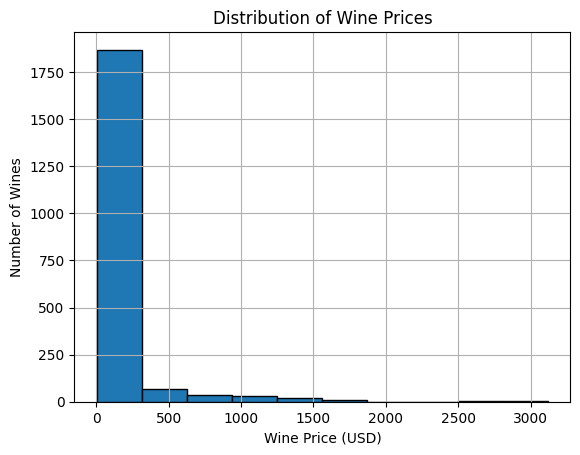

In [122]:
# Wine price distribution
ax = df['price'].hist(bins=10, edgecolor='black')

ax.set_ylabel('Number of Wines')
ax.set_xlabel('Wine Price (USD)')
ax.set_title('Distribution of Wine Prices')

#Import New Values

In [97]:
gpath = "/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo (1)/02-MachineLearning/Week07/Data/adult.csv"
dg = pd.read_csv(gpath)

In [98]:
dg.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [99]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


1. Source of data
-  This dataset named “adult” is found in the UCI machine learning repository.
2. Brief description of data
- An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
3. What is the target?
- The target is the income
4. What does one row represent? (A person? A business? An event? A product?)
- It represents an adult income
5. Is this a classification or regression problem?
- Is a classification problem
6. How many features does the data have?
- The data have 14 features
7. How many rows are in the dataset?
- 48841
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- Missing data: The dataset may contain missing values represented by unknown or null values.
- Categorical variables: The dataset likely contains categorical variables, such as education level, occupation, and marital status.
-

### Data types

In [100]:
# Use .select_dtypes to view only object columns
dg.select_dtypes

<bound method DataFrame.select_dtypes of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1 

## Drop Unwanted Columns

In [101]:
dg.drop(dg.columns [[2,5, 7,8,9,13]], axis=1, inplace = True)
dg.head()

,age,workclass,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,income
0,25,Private,11th,7,Machine-op-inspct,0,0,40,<=50K
1,38,Private,HS-grad,9,Farming-fishing,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Protective-serv,0,0,40,>50K
3,44,Private,Some-college,10,Machine-op-inspct,7688,0,40,>50K
4,18,?,Some-college,10,?,0,0,30,<=50K


## Duplicate Rows

In [102]:
# Save a filter called "duplicated_rows" that identifies duplicated rows

duplicated_rows = dg.duplicated()
# Get the sum of duplicated_rows filter to see the number of duplicate rows

dg.duplicated().sum()

16641

In [103]:
# Save a new filter called "duplicated_rows_all" that identifies ALL
# of the duplicated rows
duplicated_rows_all = dg.duplicated(keep=False)

# Calculate the sum of the duplicated_rows_all filter
duplicated_rows_all.sum()

22262

In [104]:
# Drop duplicates
dg = dg.drop_duplicates()

# Obtain the sum of duplicated to confirm all have been dropped
dg.duplicated().sum()

0

##Missing Values

In [105]:
# Get the number of null values for all columns and save as a variable
dg.isna().sum()

age                0
workclass          0
education          0
educational-num    0
occupation         0
capital-gain       0
capital-loss       0
hours-per-week     0
income             0
dtype: int64

##  Consistent Values

In [106]:
#Save a list of object columns
cat_cols = dg.select_dtypes('object').columns

In [107]:
# Remake the list of string columns
cat_cols = dg.select_dtypes('object').columns

# loop through the list of string columns

  # print the value counts for the column

  # Print an empty line for readability
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(dg[col].value_counts())

  print('\n')

Value Counts for workclass
Private             19597
Self-emp-not-inc     3523
Local-gov            2595
?                    1868
State-gov            1730
Self-emp-inc         1615
Federal-gov          1242
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


Value Counts for education
HS-grad         8611
Some-college    6565
Bachelors       5436
Masters         2174
Assoc-voc       1660
Assoc-acdm      1410
11th            1240
10th            1024
7th-8th          829
Prof-school      781
9th              653
Doctorate        553
12th             534
5th-6th          425
1st-4th          229
Preschool         77
Name: education, dtype: int64


Value Counts for occupation
Prof-specialty       4680
Exec-managerial      4391
Sales                3620
Craft-repair         3486
Adm-clerical         3165
Other-service        2951
?                    1878
Transport-moving     1728
Machine-op-inspct    1580
Farming-fishing      1325
Handlers-cleaners    121

In [108]:
# Check for inconsistencies by inspecting the value_counts for Embarked
dg['workclass'].value_counts()

Private             19597
Self-emp-not-inc     3523
Local-gov            2595
?                    1868
State-gov            1730
Self-emp-inc         1615
Federal-gov          1242
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [111]:
# Replace "?" with "Unknown"
dg['workclass'] = dg['workclass'].replace({"?" : "Unknown"})
# Check the value counts again to confirm
dg['workclass'].value_counts()

<ipython-input-111-5dcb00a8b1ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['workclass'] = dg['workclass'].replace({"?" : "Unknown"})


Private             19597
Self-emp-not-inc     3523
Local-gov            2595
Unknown              1868
State-gov            1730
Self-emp-inc         1615
Federal-gov          1242
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [110]:
# Check for inconsistencies by inspecting the value_counts for Embarked
dg['occupation'].value_counts()

Prof-specialty       4680
Exec-managerial      4391
Sales                3620
Craft-repair         3486
Adm-clerical         3165
Other-service        2951
?                    1878
Transport-moving     1728
Machine-op-inspct    1580
Farming-fishing      1325
Handlers-cleaners    1211
Tech-support         1099
Protective-serv       841
Priv-house-serv       231
Armed-Forces           15
Name: occupation, dtype: int64

In [112]:
# Replace "?" with "Unknown"
dg['occupation'] = dg['occupation'].replace({"?" : "Unknown"})
# Check the value counts again to confirm
dg['occupation'].value_counts()

<ipython-input-112-fb744896046f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['occupation'] = dg['occupation'].replace({"?" : "Unknown"})


Prof-specialty       4680
Exec-managerial      4391
Sales                3620
Craft-repair         3486
Adm-clerical         3165
Other-service        2951
Unknown              1878
Transport-moving     1728
Machine-op-inspct    1580
Farming-fishing      1325
Handlers-cleaners    1211
Tech-support         1099
Protective-serv       841
Priv-house-serv       231
Armed-Forces           15
Name: occupation, dtype: int64

Text(0.5, 1.0, 'Distribution of Annual Income')

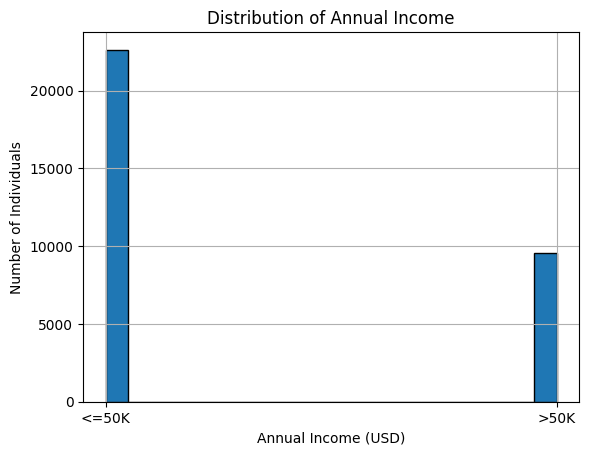

In [121]:
# Target distribution
ax = dg['income'].hist(bins=20, edgecolor='black')

ax.set_ylabel('Number of Individuals')
ax.set_xlabel('Annual Income (USD)')
ax.set_title('Distribution of Annual Income')